In [157]:
import sklearn.datasets as sk_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# data = sk_data.load_diabetes()
data = sk_data.load_iris()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
df = pd.DataFrame(data=np.c_[data['data'], np.c_[data['target']]], columns= data['feature_names'] + ['target'])

In [5]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [6]:
df = df.drop(df[df.target == 2].index)

colours = [ [ 'r', 'b' ][int(x)] for x in np.nditer(df['target'])] 


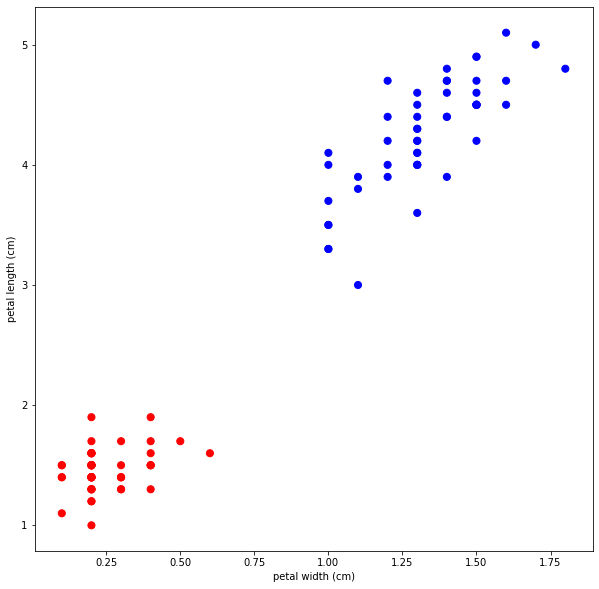

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
# plt.legend(['Setosa', 'Versicolor'])
plt.show()


## ML Implementation

In [402]:
def gradient_descent(inpu, theta, alpha, err):
    theta += alpha * (err) * inpu
    return theta

def mse(y, target):
    return 1/len(y) * np.sum((y - target)**2)

def mse_gd(x, theta, t, alpha):
    n = len(x)
    theta -= alpha * (2/n * (theta.dot(x.T) - t) * x)
    return theta

In [252]:
x0 = np.matrix([np.ones(len(df)), df['petal width (cm)'].values, df['petal length (cm)'].values])
w0 = np.matrix([-0.1, -0.1, -0.1])
target = df.target


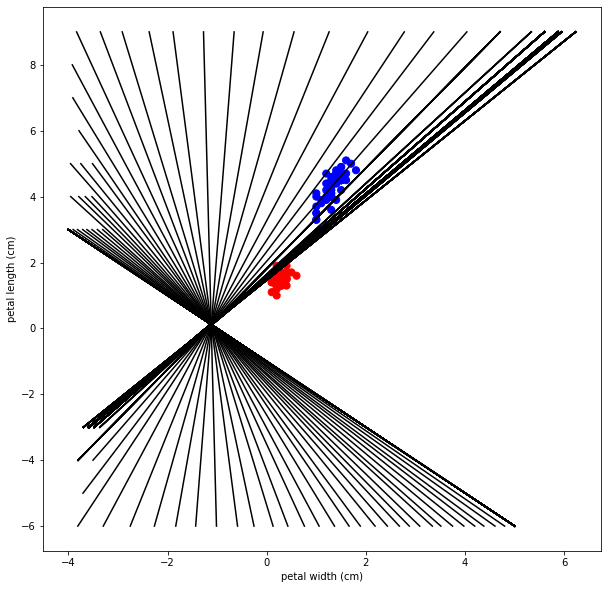

In [253]:
res = []

plt.figure(figsize=(10,10))
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
# plt.show()

while True:
    for data_point in range(len(df)):
        pred = w0.dot([x0[0, data_point], x0[1, data_point], x0[2, data_point]])
        if pred >= 0:
            pred = 1
        else:
            pred = 0
        res.append(pred)
        err = target[data_point] - pred
        w0 = gradient_descent(x0.T[data_point], w0, 0.001, err)
        
        plotDisc(np.array(w0)[0])
    if accuracy_score(res, target) >=0.99:
        break
    res = []
# print(w0)


In [446]:
x0.T

matrix([[1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.4],
        [1. , 0.3],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.1],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.1],
        [1. , 0.1],
        [1. , 0.2],
        [1. , 0.4],
        [1. , 0.4],
        [1. , 0.3],
        [1. , 0.3],
        [1. , 0.3],
        [1. , 0.2],
        [1. , 0.4],
        [1. , 0.2],
        [1. , 0.5],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.4],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.4],
        [1. , 0.1],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.1],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.3],
        [1. , 0.3],
        [1. , 0.2],
        [1. , 0.6],
        [1. , 0.4],
        [1. , 0.3],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],
        [1. , 0.2],


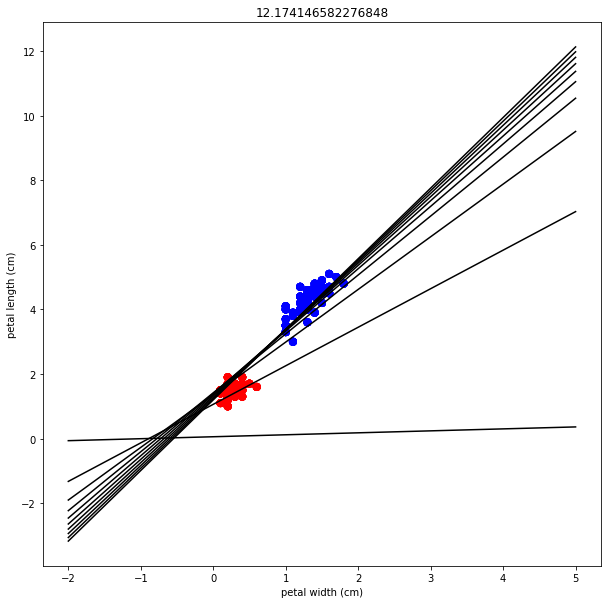

In [444]:
t = df['petal length (cm)'].values

res = []

x0 = np.matrix([np.ones(len(df)), df['petal width (cm)'].values])
w0 = np.matrix([0., 0.])
plt.figure(figsize=(10,10))
max_iter = 300
res = []
for data_point in range(max_iter):

        # pred = w0.dot([x0[0, data_point], x0[1, data_point]])

        w0 = mse_gd(x0.T, w0, t, 0.01)

        if(data_point%30==0):
                plt.plot(points, (np.array(w0.T[1] * points)[0]) + float(w0.T[0]), 'k')
                plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
                plt.xlabel('petal width (cm)')
                plt.ylabel('petal length (cm)')
                pred = np.array(w0.dot(x0))
                plt.title(mse(pred, t))
                # plt.show()
        # res.append(pred)
        

In [427]:
# points = np.linspace(-2, 5, 10)
# w0.T
np.array(w0.dot(x0))

array([[0.069392, 0.069392, 0.069392, 0.069392, 0.069392, 0.081564,
        0.075478, 0.069392, 0.069392, 0.063306, 0.069392, 0.069392,
        0.063306, 0.063306, 0.069392, 0.081564, 0.081564, 0.075478,
        0.075478, 0.075478, 0.069392, 0.081564, 0.069392, 0.08765 ,
        0.069392, 0.069392, 0.081564, 0.069392, 0.069392, 0.069392,
        0.069392, 0.081564, 0.063306, 0.069392, 0.069392, 0.069392,
        0.069392, 0.063306, 0.069392, 0.069392, 0.075478, 0.075478,
        0.069392, 0.093736, 0.081564, 0.075478, 0.069392, 0.069392,
        0.069392, 0.069392, 0.142424, 0.14851 , 0.14851 , 0.136338,
        0.14851 , 0.136338, 0.154596, 0.11808 , 0.136338, 0.142424,
        0.11808 , 0.14851 , 0.11808 , 0.142424, 0.136338, 0.142424,
        0.14851 , 0.11808 , 0.14851 , 0.124166, 0.166768, 0.136338,
        0.14851 , 0.130252, 0.136338, 0.142424, 0.142424, 0.160682,
        0.14851 , 0.11808 , 0.124166, 0.11808 , 0.130252, 0.154596,
        0.14851 , 0.154596, 0.14851 , 0.136338, 

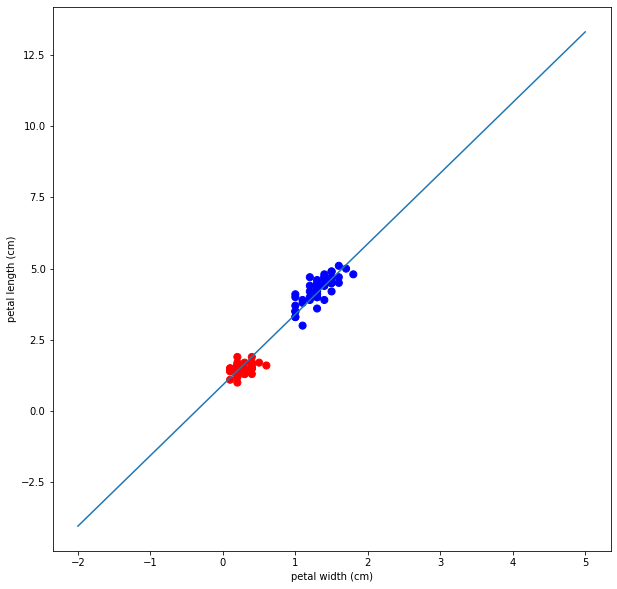

In [443]:
points = np.linspace(-2, 5, 10)
plt.figure(figsize=(10,10))
plt.scatter(df['petal width (cm)'],df['petal length (cm)'],50, colours)
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')
plt.plot(points, (np.array(w0.T[1] * points)[0]) + float(w0.T[0]))
# plt.legend(['Setosa', 'Versicolor'])
plt.show()

In [256]:
def plotDisc(w):
    if abs(w[1])>abs(w[2]):
        yr = np.arange(-6,10,1)
        xr = -(w[2]*yr+w[0])/w[1]
        valid  = (xr>-4) & (xr<10)
        plt.plot(xr[valid], yr[valid],'k')
    else:
        xr = np.arange(-4,10,1)
        yr = -(w[1]*xr+w[0])/w[2]
        valid  = (yr>-6) & (yr<10)
        plt.plot(xr[valid], yr[valid],'k')

# plotDisc([1.36891479e-08, 6.62534115e-06, 1.00625167e-20])
# df.corr()
# plt.scatter(df['bmi'], df['s5'])

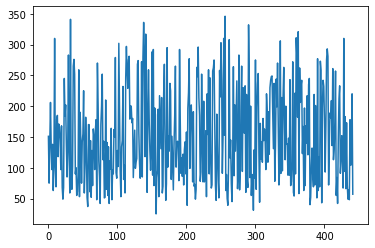

In [106]:
plt.plot(df['target'])